In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
PATH = '../input/'

In [3]:
train_data = pd.read_csv('train (1).csv')
test_data = pd.read_csv('test (1).csv')
gender_submission = pd.read_csv('gender_submission (1).csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
column_names = train_data.columns
for column in column_names:
    print(column + ' - ' + str(train_data[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [10]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Survival Probability')

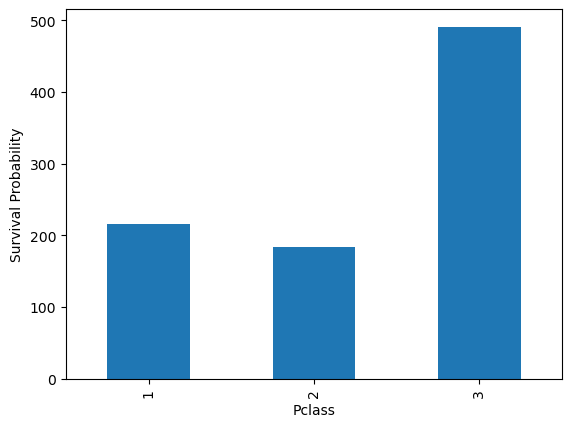

In [13]:
plt = train_data.Pclass.value_counts().sort_index().plot(kind ='bar', title='')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

In [14]:
train_data[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
train_data[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


Text(0, 0.5, 'Survival Probability')

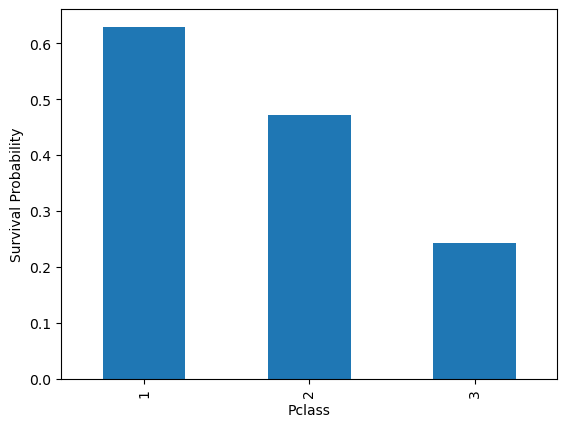

In [17]:
plt = train_data[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind = 'bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Passenger count')

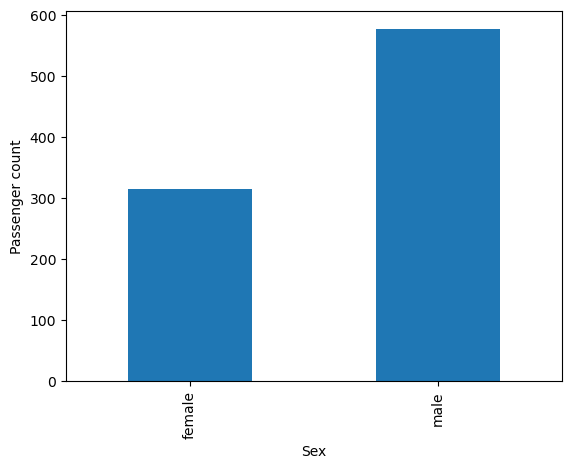

In [19]:
plt = train_data.Sex.value_counts().sort_index().plot(kind = 'bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

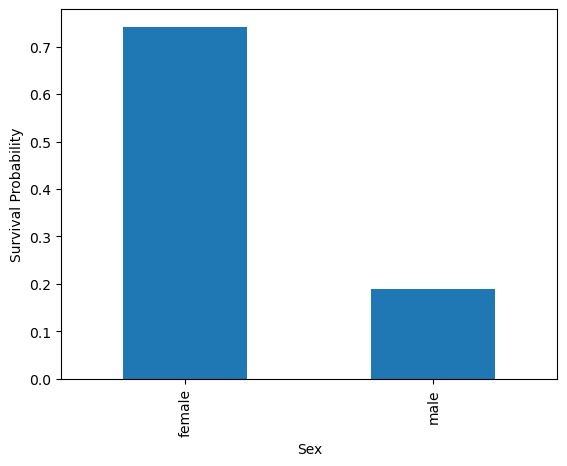

In [20]:
plt = train_data[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind = 'bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Passenger count')

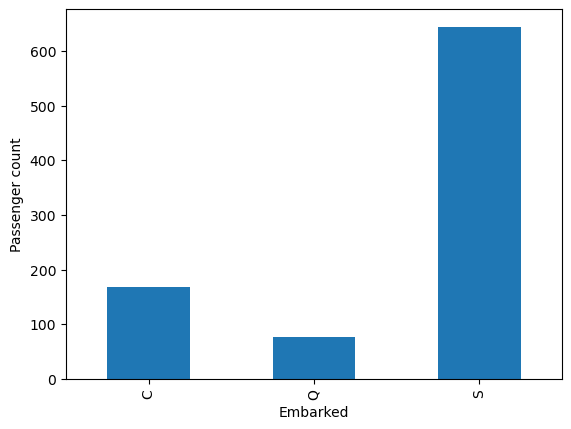

In [21]:
plt = train_data.Embarked.value_counts().sort_index().plot(kind = 'bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

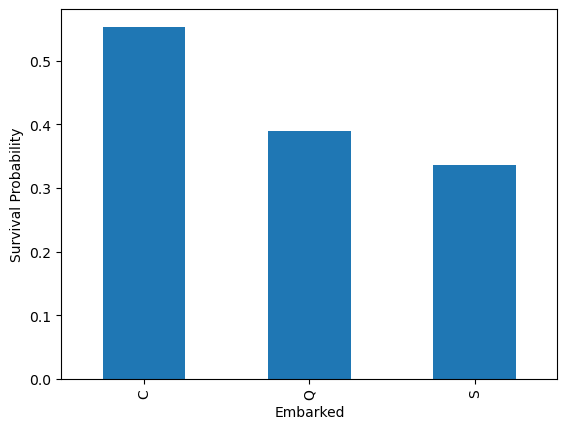

In [22]:
plt = train_data[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind = 'bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Passenger count')

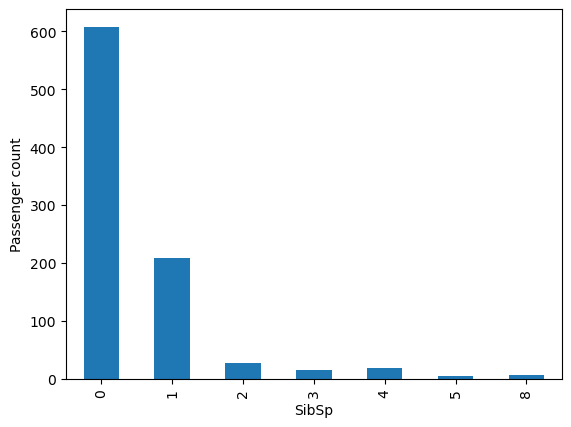

In [23]:
plt = train_data.SibSp.value_counts().sort_index().plot(kind = 'bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

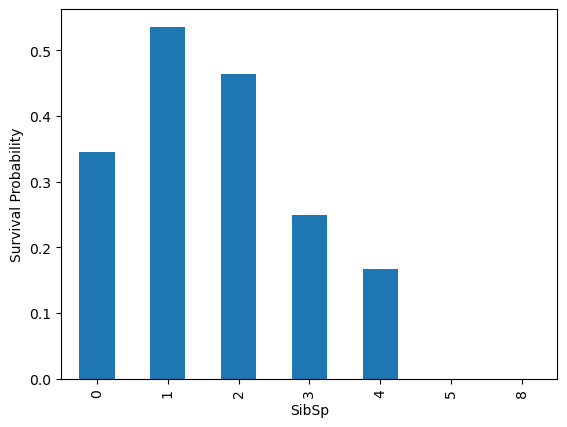

In [24]:
plt = train_data[['SibSp', 'Survived']].groupby('SibSp').mean().Survived.plot(kind = 'bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Passenger count')

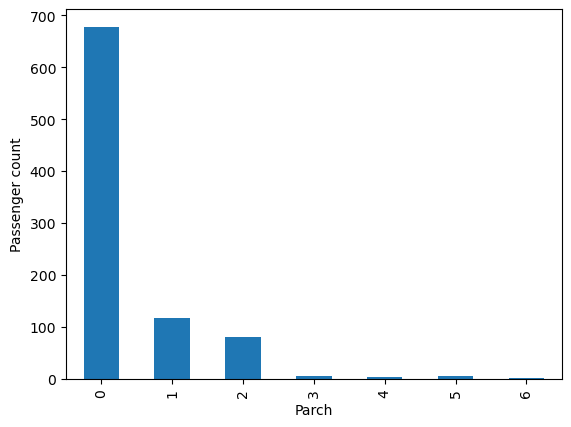

In [25]:
plt = train_data.Parch.value_counts().sort_index().plot(kind = 'bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger count')